# Precdicting Heart Disease using MAchine learning model
  in these Book we are goining to predict whether some-one has heart disaese or not using vraious machine learning model and python based machine learnig libaries by building a machine learning model

our approch is 
1. Problem defination 
2. Data
3. Evluation 
4. Modeling
5. Experimentaion

In [1]:
# Imporitng tool we need

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Moels from sklearn 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evalutaions
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import precision_score , recall_score , f1_score
from sklearn.metrics import plot_roc_curve

In [2]:
df=pd.read_csv("heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [4]:
len("target")

6

In [5]:
165+138

303

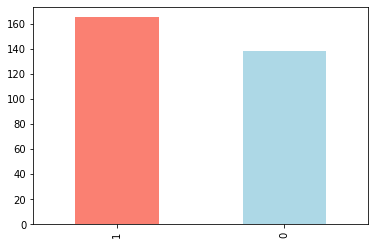

In [6]:
df["target"].value_counts().plot(kind="bar",color=["salmon","lightblue"]);

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart Disease frequncy according to Sex(Gender)

In [10]:
df.value_counts("sex") 

sex
1    207
0     96
dtype: int64

In [11]:
#Comparing target Column with Sex column
pd.crosstab(df.target , df.sex)

sex,0,1
target,,
0,24,114
1,72,93


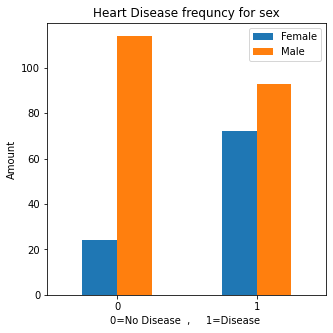

In [12]:
pd.crosstab(df.target,df.sex).plot(kind="bar",
                                  figsize=(5,5));

plt.title("Heart Disease frequncy for sex")
plt.xlabel("0=No Disease  ,     1=Disease ")
plt.ylabel("Amount")
plt.legend(["Female","Male"]);
plt.xticks(rotation=0);

### Age vs Max heart rate for heart Disease

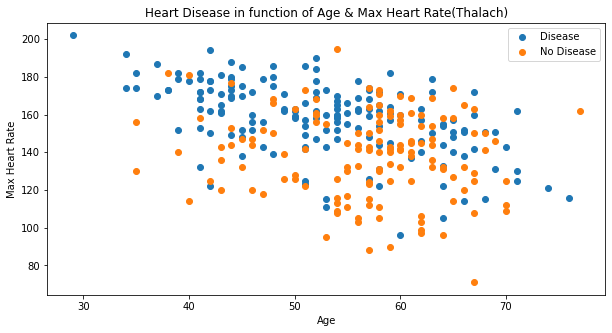

In [13]:
plt.figure(figsize=(10,5))
#Creating  figure with Positive example

plt.scatter(df.age[df.target==1],
          df.thalach[df.target==1],)
                     
#creating scatter with negative exapmle\
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0])


#Adding some helpful Info
plt.title("Heart Disease in function of Age & Max Heart Rate(Thalach)")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease","No Disease"])
plt.figsize=[3 , 8];

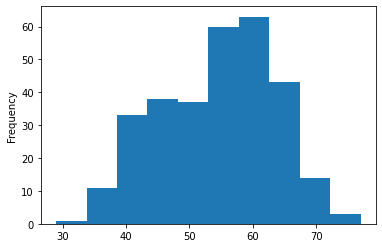

In [14]:
df["age"].plot.hist();

#(Cp - Chest pain)  Heart Disease frequncy for cheast Pain Type

`There are fore types of Chest Pain`


0. Typical angina: Chest related decreases blood suply to the heart
1. Atypical angina : Chest pain related to  heart
2. Non-anignal ; Typical esophagel spasms (non heart disease)
3. Asymptomatic : cheat pain not showing sings  of heart Disease



In [15]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


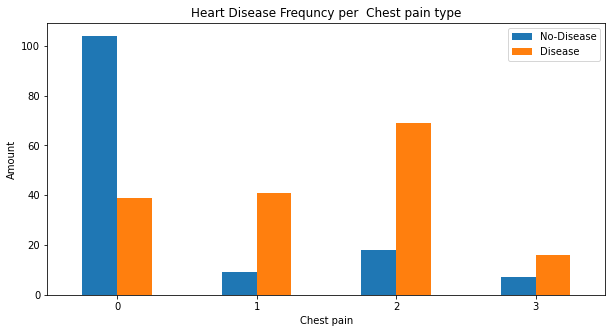

In [16]:
#MAking crosstab more Visual
pd.crosstab(df.cp,df.target).plot(kind="bar",
                                 figsize=(10,5))

# Adding  some information\
plt.title("Heart Disease Frequncy per  Chest pain type")
plt.xlabel("Chest pain")
plt.ylabel("Amount")
plt.legend(["No-Disease","Disease"])
plt.xticks(rotation=0);

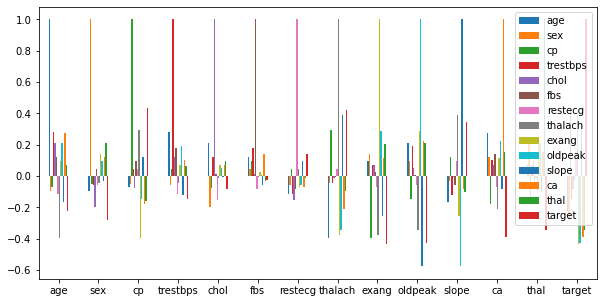

In [17]:
df.corr().plot(kind="bar",
              figsize=(10,5),
              )
plt.xticks(rotation=0);

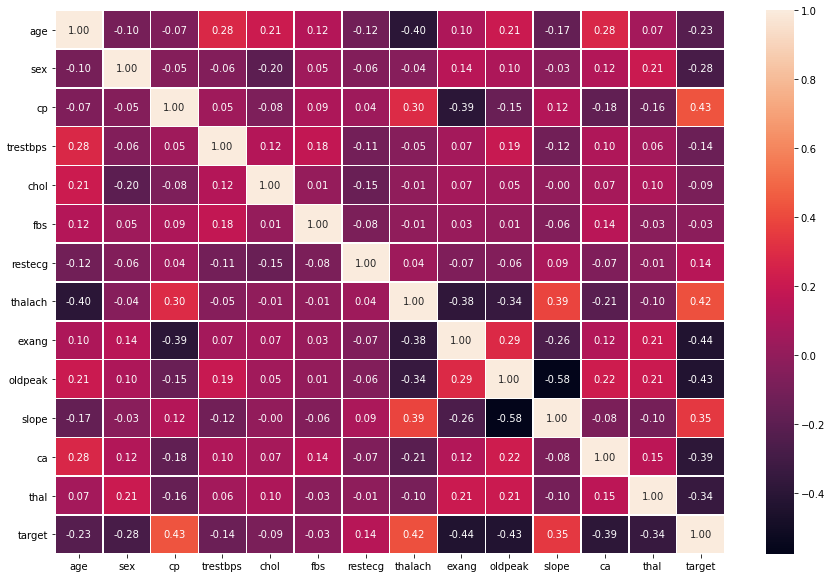

In [18]:
corr_matrix = df.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f")


## Modeling

In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
# Creating X & y labels
X = df.drop("target",axis=1)
y = df["target"]

#Splitting the data into training  and tesing
X_train , X_test , y_train ,y_test = train_test_split (X ,y , test_size=0.2)


In [21]:
X_train 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
219,48,1,0,130,256,1,0,150,1,0.0,2,2,3
47,47,1,2,138,257,0,0,156,0,0.0,2,0,2
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
291,58,1,0,114,318,0,2,140,0,4.4,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
218,65,1,0,135,254,0,0,127,0,2.8,1,1,3
150,66,1,0,160,228,0,0,138,0,2.3,2,0,1
37,54,1,2,150,232,0,0,165,0,1.6,2,0,3


In [22]:
y_train

246    0
219    0
47     1
60     1
291    0
      ..
179    0
218    0
150    1
37     1
127    1
Name: target, Length: 242, dtype: int64

In [23]:
#Putting Models into Dictonory

models = {"Logistic Regression": LogisticRegression(),
        "KNM": KNeighborsClassifier(),
        "Random Forest": RandomForestClassifier()}

#Creating a function to fit and Score models
def fit_and_score(models , X_train, X_test, y_train , y_test):
    """
    Fits and evluate given machine learnig models.
    models: a dict of diffrent Scikit-learn machine learnig models
    X_train : training data (no- labels)
    X_test: testing data(no-lables)
    y_train: training the data
    y_test: test_lables
    """
    # set random seed
    np.random.seed(42)
    # Make a dictinory to keep models scores
    model_scores = {}
    #loop through models
    for name, model in models.items():
        #fit the model to the data 
        model.fit(X_train , y_train)
        #Evluate the model and  append its score to model_scores
        model_scores[name]=model.score(X_test,y_test)
    return model_scores

In [24]:
model_scores= fit_and_score(models= models,
                           X_train=X_train,
                           X_test=X_test,
                           y_train=y_train,
                           y_test=y_test)
model_scores

C:\Users\Gulshan\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNM': 0.7049180327868853,
 'Random Forest': 0.9016393442622951}

`Model Comparison`

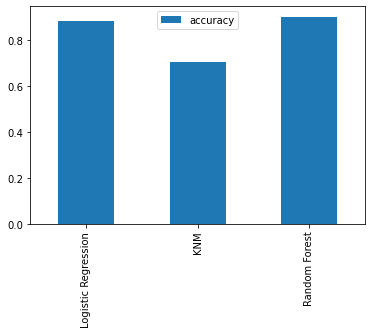

In [25]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

* Hyperparameter tuning
* Feature importance
* Confuson matrix
* Cross-validiation 
* Precision
* Recall
* F1 score
* Classification report 
*  ROC curve
* AUC (Area under curve)

### Hyperparameter tunig 

In [26]:
# tuning the KNN
train_scores = []
test_scores = []

#Creating the list of diffrent values for n_neighbors
neighbors = range(1,21)

#setup KNN instance
knn = KNeighborsClassifier()

#Loop through diffrent n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    #Fit the algorithm
    knn.fit(X_train,y_train )
    
    # Updating  the training scores list
    train_scores.append(knn.score(X_train,y_train))
    
    #updating  the testing scores list 
    test_scores.append(knn.score(X_test,y_test))

In [27]:
train_scores 

[1.0,
 0.7851239669421488,
 0.768595041322314,
 0.7355371900826446,
 0.756198347107438,
 0.743801652892562,
 0.7066115702479339,
 0.71900826446281,
 0.6942148760330579,
 0.6983471074380165,
 0.7024793388429752,
 0.6983471074380165,
 0.7024793388429752,
 0.6859504132231405,
 0.6818181818181818,
 0.6983471074380165,
 0.6859504132231405,
 0.6859504132231405,
 0.6942148760330579,
 0.7024793388429752]

In [28]:
test_scores

[0.7049180327868853,
 0.6229508196721312,
 0.7213114754098361,
 0.7049180327868853,
 0.7049180327868853,
 0.7049180327868853,
 0.7868852459016393,
 0.7377049180327869,
 0.7868852459016393,
 0.7704918032786885,
 0.7868852459016393,
 0.7377049180327869,
 0.7377049180327869,
 0.7213114754098361,
 0.7049180327868853,
 0.7377049180327869,
 0.7213114754098361,
 0.7213114754098361,
 0.7049180327868853,
 0.7704918032786885]

maximum kNN score on the best data : 78.69%


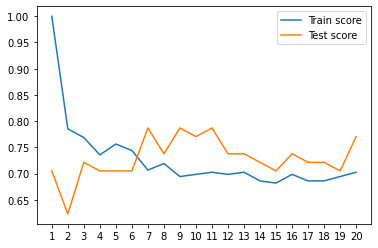

In [29]:
plt.plot(neighbors,train_scores , label= "Train score")
plt.plot(neighbors, test_scores, label ="Test score")
plt.xlabel=("Number of neighbors")
plt.ylabel=("model Score")
plt.xticks(np.arange(1,21,1))
plt.legend()

print(f'maximum kNN score on the best data : {max(test_scores)*100:.2f}%' )

# Hyperparameter tuning with RandomizedSerchCV

we are going to tune :

    * LogisticRegression()
    
    * RandomForestClassifier()
    
    ...using RandomizedSerchCV

In [30]:
# Creating Hyperparameter grid for LogisticRegression
log_reg_grid = {"C":  np.logspace(-4, 4, 20),
               "solver": ["liblinear"]}

# Creating Hyperparameter grid for RandomforestClassfier
rf_grid = {"n_estimators": np.arange(10,1000,50),
          "max_depth":[None , 3 , 5 , 10],
          "min_samples_split": np.arange(2,20,2),
          "min_samples_leaf": np.arange(1,20,2)}

#Now we have got HyperParaMeter grids setup for each of our models , lt's tune them using RandomizedSerchcV

In [31]:
# Tuning LogisticRegression

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [32]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 4.281332398719396}

In [33]:
rs_log_reg.score(X_test,y_test)

0.8524590163934426

 **Now we have tuned Logisticregression() , Now the same doning for  RandmForestClassfier()**

In [34]:
# Setup a Random seed
np.random.seed(23)

# Setup random Hyperparameter serch for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose= True)

# Fitting random hyperparametr serch model for RandomForestClassfier()
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [35]:
rs_rf.best_params_

{'n_estimators': 660,
 'min_samples_split': 2,
 'min_samples_leaf': 3,
 'max_depth': 3}

In [36]:
rs_rf.score(X_test,y_test)

0.9180327868852459

In [37]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNM': 0.7049180327868853,
 'Random Forest': 0.9016393442622951}

# Hyperparameter  tuningg with GridSerchCV

`Since our LogisticRegression model provides the best scores so far , we"ll try  and improve them by using GridSerchCV`

In [38]:
# diffrent hyperparaeter for  our LogisticRegression model
log_reg_grid = {"C":np.logspace(-4,4,30),
               "solver":["liblinear"]}

# Setup grid hyperparameter search for LogosticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)


gs_log_reg.fit(X_train,y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [39]:
gs_log_reg.best_params_

{'C': 0.38566204211634725, 'solver': 'liblinear'}

In [40]:
 gs_log_reg.score(X_test,y_test)

0.8688524590163934

# Evaluating our tuned  machine learning classfier , beyond accuracy

* ROC curve
* Confusion matrix 
* Classfication Score
* Precison
* Recall
* F1 Score

In [41]:
y_preds = gs_log_reg.predict(X_test)

In [42]:
y_preds

array([1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0], dtype=int64)

In [43]:
y_test

104    1
12     1
163    1
293    0
288    0
      ..
265    0
83     1
242    0
137    1
212    0
Name: target, Length: 61, dtype: int64

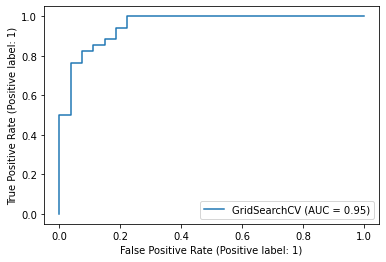

In [44]:
# Plotting a ROC curve and  Calculating AUC metric
plot_roc_curve(gs_log_reg,X_test, y_test);

In [45]:
 print(confusion_matrix(y_test,y_preds))

[[22  5]
 [ 3 31]]


TypeError: 'str' object is not callable

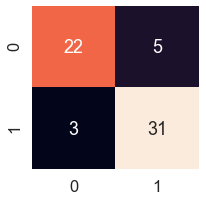

In [46]:
sns.set(font_scale=1.5)


def plot_conf_mat(y_test,y_preds):
    """
    Plots a nice looking confusion matrix using seaborn"s heatmap()
    """
    
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")

    
plot_conf_mat(y_test,y_preds)

In [47]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.88      0.81      0.85        27
           1       0.86      0.91      0.89        34

    accuracy                           0.87        61
   macro avg       0.87      0.86      0.87        61
weighted avg       0.87      0.87      0.87        61



In [48]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 4.281332398719396}

## Calculating evalatio matrix using cross-validation matrix


 we"re going to calculate precision , recall , and  f-1 score of our model using cross-validation and to do so we'll be using `Cross_val_score()`

In [49]:
clf = LogisticRegression(C=0.615848211066026,
                        solver='liblinear')

In [50]:
# Cross validated Accuracy
cv_acc = cross_val_score(clf,
                        X, 
                        y,
                        cv=5,
                        scoring="accuracy")
cv_acc=cv_acc.mean()
cv_acc

0.8249180327868852

In [51]:
# Cross-validated Precision
cv_pre = cross_val_score(clf,X,y,cv=5,scoring="precision")
cv_pre = cv_pre.mean() 
cv_pre

0.8122549019607843

In [52]:
# Cross-Validated recall
cv_rec = cross_val_score(clf ,
                        X ,
                        y,
                        scoring="recall")
cv_rec = cv_rec.mean()
cv_rec

0.890909090909091

In [53]:
# cross-validated f1-Score

cv_f1 = cross_val_score(clf,
                       X,
                       y,
                       scoring="f1")

cv_f1 = cv_f1.mean()
cv_f1

0.8481221874318333

<AxesSubplot:title={'center':' Cross-validted Claassfication metrics'}>

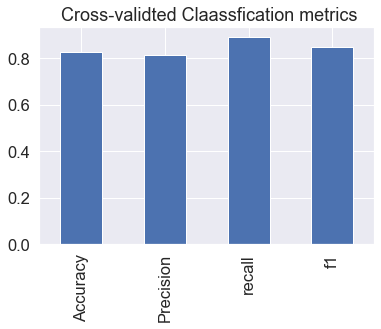

In [54]:
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                          "Precision":cv_pre,
                          "recall":cv_rec,
                          "f1":cv_f1},
                         index=[0])

cv_metrics.T.plot.bar(title = " Cross-validted Claassfication metrics",
                     legend=False)

## Feature imp


feture importace is, which part of data help , is most contriuate to predicting result

In [55]:
# Fir instansiate  of LogisticRegresion

clf = LogisticRegression(C = 0.20433597178569418,
                        solver= 'liblinear')


clf.fit(X_train,y_train);


In [56]:
clf.features_

array([[ 1.15092078e-02, -8.86514327e-01,  7.01431042e-01,
        -1.19895383e-02, -2.28031685e-03,  4.08794157e-04,
         3.70334641e-01,  1.98449808e-02, -4.11676494e-01,
        -5.00654670e-01,  3.29888607e-01, -6.52890576e-01,
        -4.40751960e-01]])

In [57]:
# Matcing coeficient of fetures to the columns

feture_dict = dict(zip(df.columns, list(clf.coef_[0])))
feture_dict

{'age': 0.011509207829192286,
 'sex': -0.8865143268393378,
 'cp': 0.7014310423677373,
 'trestbps': -0.01198953831965399,
 'chol': -0.0022803168498270058,
 'fbs': 0.0004087941569746968,
 'restecg': 0.37033464095625174,
 'thalach': 0.0198449807648627,
 'exang': -0.41167649363203646,
 'oldpeak': -0.5006546703436612,
 'slope': 0.32988860654359176,
 'ca': -0.652890575545706,
 'thal': -0.4407519601138824}

<AxesSubplot:title={'center':'Feature Importance'}>

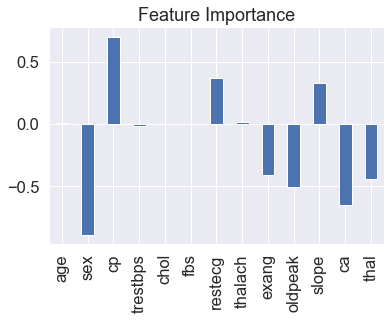

In [58]:
# Visualizeing  feture  importace 
feature_df = pd.DataFrame(feture_dict , index=[0])
feature_df.T.plot.bar(title="Feature Importance",legend=False)